# Aula 01 - Parte 1
## Transformações Lineares

Nesta primeira parte da aula faremos uma breve revisão de transformações lineares. Vamos começar pensando em transformações em 2D.

### Rotação

Crie uma função que recebe um ângulo $\theta$ e devolve uma matriz de rotação representada por um *numpy.array*. Os pontos são representados em [coordenadas homogêneas](https://en.wikipedia.org/wiki/Homogeneous_coordinates).

In [1]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
# Funções úteis
def ponto(x, y):
    return np.array([x, y, 1]).reshape((3, 1))

def prettypt(pt):
    return tuple(pt.flatten())

def testar_funcao(funcao, entradas, parametros, saidas):
    EPSILON = 1e-1  # Sim, ele vai aceitar um erro grande...
    tudo_ok = True
    for entrada, parametro, saida_esperada in zip(entradas, parametros, saidas):
        if isinstance(parametro, tuple):
            mat = funcao(*parametro)
        else:
            mat = funcao(parametro)
        saida_obtida = mat.dot(entrada)
        if not np.allclose(saida_obtida, saida_esperada, atol=EPSILON):
            tudo_ok = False
            print('Erro para entrada {}. Esperado={}, Obtido={}'.format(prettypt(entrada), prettypt(saida_esperada), prettypt(saida_obtida)))
    if tudo_ok:
        print('Tudo OK :)')

In [7]:
def rotation_matrix(theta):
#     theta = np.radians(theta)
    c, s = np.cos(theta), np.sin(theta)
    R = np.array(((c, -s, 0), (s, c, 0), (0, 0, 1)))
    return R

In [10]:
rotation_matrix(30)

array([[ 0.15425145,  0.98803162,  0.        ],
       [-0.98803162,  0.15425145,  0.        ],
       [ 0.        ,  0.        ,  1.        ]])

Abra o arquivo *Rotacao.ggb* utilizando o software [Geogebra](https://www.geogebra.org/download). Gere mais 10 valores para testar a sua função movendo o ponto $p$ e alterando o valor de $\theta'$ no programa.

In [8]:
# Os pontos são representados por tuplas (x, y)
entradas = [
    ponto(4, 2),
    ponto(3, 2),
    ponto(2, 2),
    ponto(0, 2),
    ponto(4, 1),
    ponto(3, 3),
    ponto(1, 0),
    ponto(2, 4),
    ponto(1, 0),
    ponto(1, 1)
]
angulos = [
    0.64, # Em radianos
    5.15, 
    0.57, 
    1.95, 
    0.57, 
    3.96, 
    0.44, 
    4.21, 
    2.58, 
    5.09, 
]
saidas = [
    ponto(2, 4),
    ponto(3.09, -1.86),
    ponto(0.62, 2.76),
    ponto(-1.86, -0.74),
    ponto(2.84, 2.99),
    ponto(0.13, -4.24),
    ponto(0.9, 0.43),
    ponto(2.54, -3.68),
    ponto(-0.84, 0.54),
    ponto(1.3, -0.56),
    # ADICIONE OUTRAS SAÍDAS ESPERADAS AQUI...
]

In [9]:
# Testando a função...
testar_funcao(rotation_matrix, entradas, angulos, saidas)

Tudo OK :)


### Escala

Crie uma função que recebe um valor $s$ e devolve uma matriz de escala.

In [14]:
def scale_matrix(s):
    R = np.array(((s, 0, 0), (0, s, 0), (0, 0, 1)))
    return R

In [15]:
# Gerando alguns valores para teste...
n = 10
entradas = [ponto(x, y) for x in range(n) for y in range(n)]
fatores = [i+2 for i in range(n*n)]  # Poderiam ser outros valores (o +2 é arbitrário)
saidas = [ponto(p[0,0]*s, p[1,0]*s) for p, s in zip(entradas, fatores)]

# Testando a função...
testar_funcao(scale_matrix, entradas, fatores, saidas)

Tudo OK :)


### Translação

Crie uma função que recebe dois valores $t_x$ e $t_y$ e devolve uma matriz de translação.

In [16]:
def translation_matrix(tx, ty):
    R = np.array(((1, 0, tx), (0, 1, ty), (0, 0, 1)))
    return R

In [17]:
# Gerando alguns valores para teste...
n = 10
entradas = [ponto(x, y) for x in range(n) for y in range(n)]
translacoes = [(i+2, i+3) for i in range(n*n)]  # Poderiam ser outros valores (o +2 e +3 são arbitrários)
saidas = [ponto(p[0,0]+t[0], p[1,0]+t[1]) for p, t in zip(entradas, translacoes)]

# Testando a função...
testar_funcao(translation_matrix, entradas, translacoes, saidas)

Tudo OK :)


## Transformações em imagens

Crie duas funções que recebem uma imagem, um fator de escala $s$, um ângulo $\theta$ e uma translação $(t_x, t_y)$ e devolvem uma nova imagem aplicando a escala, rotação e translação, nesta ordem. As duas funções diferem na maneira de gerar a imagem final:

1) A primeira função deve percorrer cada pixel da imagem original e calcular onde ele deve aparecer na imagem final

2) A segunda função deve percorrer cada pixel da imagem final e calcular de onde ele veio na imagem original.

In [113]:
def aplica_transformacao_v1(img, s, theta, tx, ty):
    res = np.zeros_like(img)  # res é a imagem a ser devolvida
    h, w, t = img.shape
    scale = scale_matrix(s)
    rotation = rotation_matrix(theta)
    translation = translation_matrix(tx, ty)
    
    for i in range(h):
        for j in range(w):
            p = np.dot(translation, (np.dot(rotation, np.dot(scale, [j, i, 1]))))
            if int(p[0]) < 0  or int(p[1]) < 0 or int(p[0]) >= w or int(p[1]) >= h:
                pass
            else:
                res[int(p[1]), int(p[0])] = img[i, j]
    return res

def aplica_transformacao_v2(img, s, theta, tx, ty):
    res = np.zeros_like(img)  # res é a imagem a ser devolvida
    h, w, t = img.shape
    scale = np.linalg.inv(scale_matrix(s))
    rotation = np.linalg.inv(rotation_matrix(theta))
    translation = np.linalg.inv(translation_matrix(tx, ty))
    
    for i in range(h):
        for j in range(w):
            p = np.dot(scale, (np.dot(rotation, np.dot(translation, [j, i, 1]))))
            if int(p[0]) < 0  or int(p[1]) < 0 or int(p[0]) >= w or int(p[1]) >= h:
                pass
            else:
                res[i, j] = img[int(p[1]), int(p[0])]
    return res

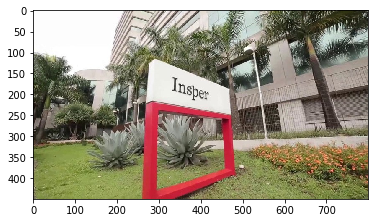

In [100]:
# Carregando a imagem de teste
img = plt.imread('insper-fachada.jpg')
plt.imshow(img)

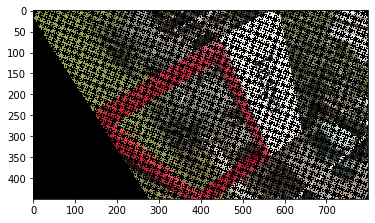

In [101]:
# Testando a primeira versão da função
plt.imshow(aplica_transformacao_v1(img, 1.5, 1, 500, -450))

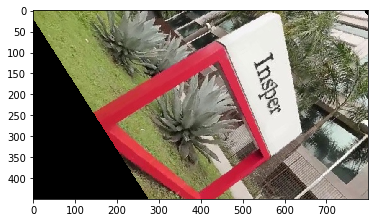

In [114]:
# Testando a segunda versão da função
plt.imshow(aplica_transformacao_v2(img, 1.5, 1, 500, -450))

# Para pensar

1. Qual a diferença entre as imagens geradas? Por que essa diferença existe?
2. A ordem das transformações faz diferença? Faça um teste:
    1. Crie uma lista com 4 pontos nos cantos de um quadrado
    2. Gere uma imagem em branco e desenhe os 4 pontos
    3. Gere uma matriz de translação, uma de rotação e outra de escala
    4. Aplica as 3 transformações sobre os 4 pontos em todas as ordens possíveis (6 no total)
    5. Para cada combinação desenhe os 4 pontos transformados com outra cor

In [14]:
# IMPLEMENTE O TESTE DO EXERCÍCIO 2 AQUI